# Covid 19 Data Visualization And Pridiction

In [1]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns


CVD = pd.read_csv(r"D:\STUDY 5\SCM Project/covid_19_india.csv")
print(CVD.head())

#Check for missing data
print(CVD.isnull().sum()) #No missing data
CVD=CVD.dropna()


CVD.drop(['Sno', 'Time', 'Cured', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1, inplace=True)

print(CVD.dtypes)

# Convert string values of date to datetime format
#CVD['Date'] = CVD['Date'].astype(str)
CVD['Date'] = [dt.datetime.strptime(x,'%d/%m/%y') for x in CVD['Date']] 
print(CVD.dtypes)



#Change column titles to something appropriate
CVD.columns = ['Date', 'State', 'Total Deaths', 'Total Cases']

#Group them by location and date, select only total cases and deaths for closer observation
#Reset index because groupby by default makes grouped columns indices
CVD = pd.DataFrame(CVD.groupby(['State', 'Date'])['Total Cases', 'Total Deaths'].sum()).reset_index()

#Sort values by each country and by date - descending. Easy to interpret plots
CVD = CVD.sort_values(by = ['State','Date'], ascending=False)
print(CVD)

   Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM               Kerala                       1   
1    2  31/01/20  6:00 PM               Kerala                       1   
2    3  01/02/20  6:00 PM               Kerala                       2   
3    4  02/02/20  6:00 PM               Kerala                       3   
4    5  03/02/20  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3  
Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths         

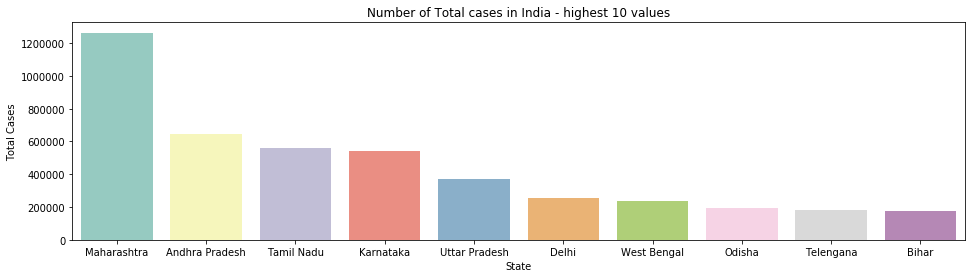

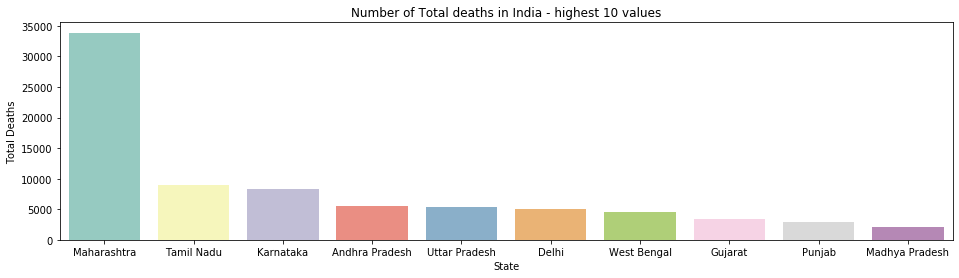

In [2]:
#Plot cases and deaths as bar plot for top 10 countries
#Function to plot bar plots using Seaborn.

def plot_bar(feature, value, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    df = df.sort_values([value], ascending=False).reset_index(drop=True)
    g = sns.barplot(df[feature][0:10], df[value][0:10], palette='Set3')
    g.set_title("Number of {} - highest 10 values".format(title))
#    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()    

filtered_CVD = CVD.drop_duplicates(subset = ['State'], keep='first')
plot_bar('State', 'Total Cases', 'Total cases in India', filtered_CVD, size=4)
plot_bar('State', 'Total Deaths', 'Total deaths in India', filtered_CVD, size=4)

          Date  Total Cases  Total Deaths
0   2020-01-30            1             0
1   2020-01-31            1             0
2   2020-02-01            2             0
3   2020-02-02            3             0
4   2020-02-03            3             0
5   2020-02-04            3             0
6   2020-02-05            3             0
7   2020-02-06            3             0
8   2020-02-07            3             0
9   2020-02-08            3             0
10  2020-02-09            3             0
11  2020-02-10            3             0
12  2020-02-11            3             0
13  2020-02-12            3             0
14  2020-02-13            3             0
15  2020-02-14            3             0
16  2020-02-15            3             0
17  2020-02-16            3             0
18  2020-02-17            3             0
19  2020-02-18            3             0
20  2020-02-19            3             0
21  2020-02-20            3             0
22  2020-02-21            3       

C:\Users\Hp\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


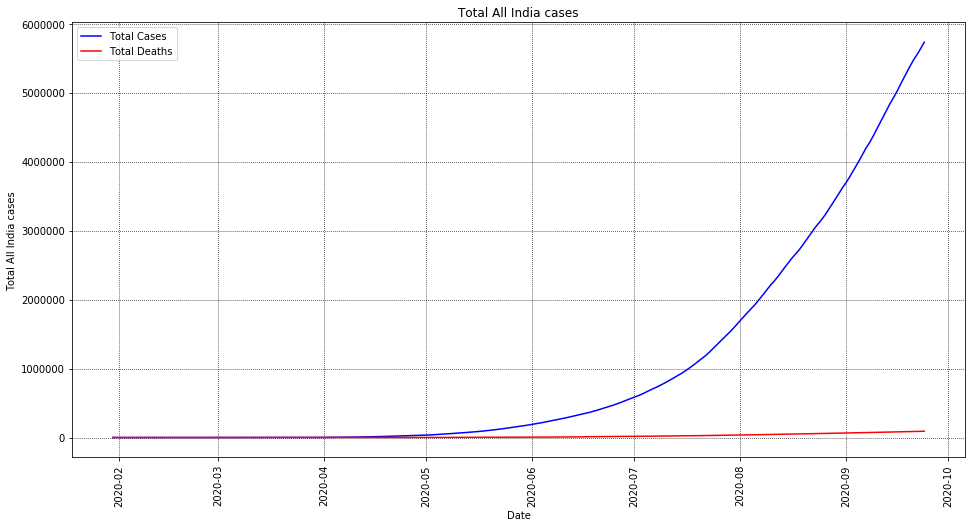

In [3]:
#Plot world aggregate numbers for total cases and deaths. 
def plot_world_aggregate(df, title='Aggregate plot', size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,2*size))
    g = sns.lineplot(x="Date", y='Total Cases', data=df, color='blue', label='Total Cases')
    g = sns.lineplot(x="Date", y='Total Deaths', data=df, color='red', label='Total Deaths')
    plt.xlabel('Date')
    plt.ylabel(f'Total {title} cases')
    plt.xticks(rotation=90)
    plt.title(f'Total {title} cases')
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

#Group by dates. 
#Reset index because groupby by default makes grouped columns indices
#Sum values from all countries per given date
CVD_aggregate = CVD.groupby(['Date']).sum().reset_index()
print(CVD_aggregate)

plot_world_aggregate(CVD_aggregate, 'All India', size=4)

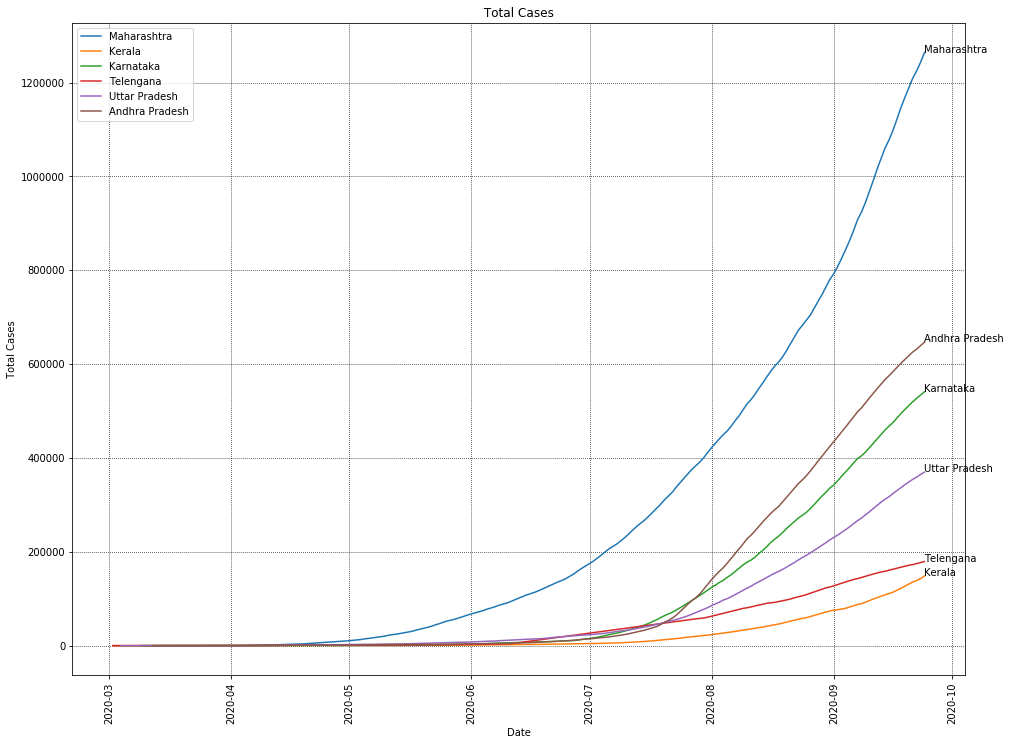

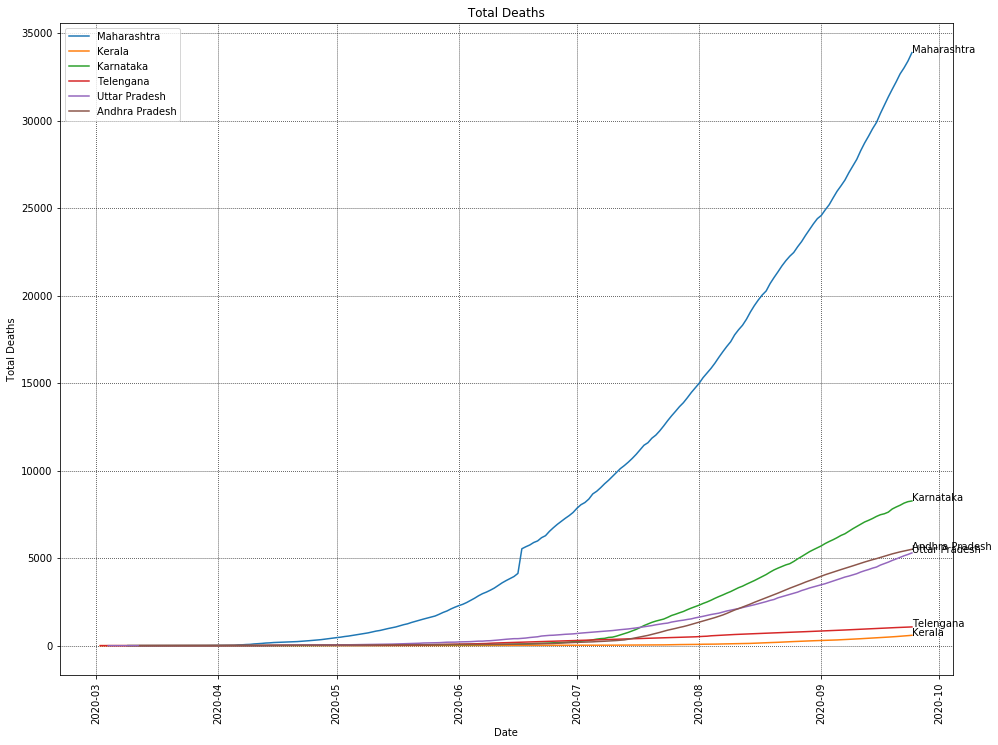

In [4]:
#Plot aggregate numbers for total cases and deaths for select countries. 
#Starting from Feb 15th 

def plot_aggregate_states(df, states, case_type='Total Cases', size=3, is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size, 3*size))
    for state in states:
        df_ = df[(df['State']==state) & (df['Date'] > '2020-03-01')] 
        g = sns.lineplot(x="Date", y=case_type, data=df_,  label=state)  
        ax.text(max(df_['Date']), max(df_[case_type]), str(state))
    plt.xlabel('Date')
    plt.ylabel(f' {case_type} ')
    plt.title(f' {case_type} ')
    plt.xticks(rotation=90)
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()
CVD_state_aggregate = CVD.groupby(['State', 'Date']).sum().reset_index()

states = ["Maharashtra", "Kerala", "Karnataka", "Telengana", 
                         "Uttar Pradesh", "Andhra Pradesh"]
plot_aggregate_states(CVD_state_aggregate, states, case_type = 'Total Cases', size=4)    

plot_aggregate_states(CVD_state_aggregate, states, case_type = 'Total Deaths', size=4)

#log scale
#plot_aggregate_states(CVD_state_aggregate, states, case_type = 'Total Cases', size=4, is_log=True)

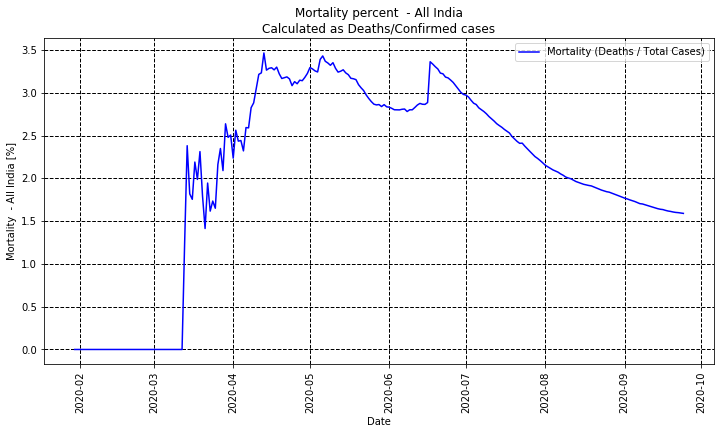

In [5]:
#Calculate MORTALITY and plot

def plot_mortality(df, title='Mortality', size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,2*size))
    g = sns.lineplot(x="Date", y='Mortality (Deaths/Cases)', data=df, color='blue', label='Mortality (Deaths / Total Cases)')
    plt.xlabel('Date')
    plt.ylabel(f'Mortality {title} [%]')
    plt.xticks(rotation=90)
    plt.title(f'Mortality percent {title}\nCalculated as Deaths/Confirmed cases')
    ax.grid(color='black', linestyle='dashed', linewidth=1)
    plt.show()  

CVD_aggregate['Mortality (Deaths/Cases)'] = CVD_aggregate['Total Deaths'] / CVD_aggregate['Total Cases'] * 100
plot_mortality(CVD_aggregate, title = ' - All India', size = 3)

In [6]:
#PREDICTION using exponential fit 
import numpy as np
import scipy
import seaborn as sns
def plot_exponential_fit_data(d_df, title, delta):
    d_df = d_df.sort_values(by=['Date'], ascending=True)
    d_df['x'] = np.arange(len(d_df)) + 1  #Add column x to the dataframe 
    d_df['y'] = d_df['Total Cases']   #Add column y to the dataframe 
    x = d_df['x'][:-delta]  #Remove delta number of data points (so we can predict them)
    y = d_df['y'][:-delta]  #Remove delta number of data points (so we can predict them)
#Use non-linear least squares to fit a function, f, to data.
#Let us fit data to exponential function: #y = Ae^(Bt)
    
    c2 = scipy.optimize.curve_fit(lambda t, a, b: a*np.exp(b*t),  x,  y,  p0=(20, 0.2)) 
# Function: lambda t, a, b: a*np.exp(b*t)
# xm y and po for initial values. 
    
    A, B = c2[0]  #Coefficients
    print(f'(y = Ae^(Bx)) A: {A}, B: {B}\n')
    x = range(1,d_df.shape[0] + 1)
    y_fit = A * np.exp(B * x)
#    print(y_fit)
    f, ax = plt.subplots(1,1, figsize=(12,6))
    g = sns.scatterplot(x=d_df['x'][:-delta], y=d_df['y'][:-delta], label='Confirmed cases (used for model creation)', color='red')
    g = sns.scatterplot(x=d_df['x'][-delta:], y=d_df['y'][-delta:], label='Confirmed cases (not used for model, va;idation)', color='blue')
    g = sns.lineplot(x=x, y=y_fit, label='Predicted values', color='green')  #Predicted
    x_future=range(89,95) #As of 24 March 2020 we have 85 days of info. 
    y_future=A * np.exp(B * x_future)
    print("Expected cases for the next 5 days: \n", y_future)
    plt.xlabel('Days since first case')
    plt.ylabel(f'Total cases')
    plt.title(f'Confirmed cases & projected cases: {title}')
    plt.xticks(rotation=90)
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

(y = Ae^(Bx)) A: 1382.0809032721015, B: 0.032474125699443704

Expected cases for the next 5 days: 
 [24873.11376434 25694.104721   26542.19426119 27418.27683231
 28323.27640493 29258.14744728]


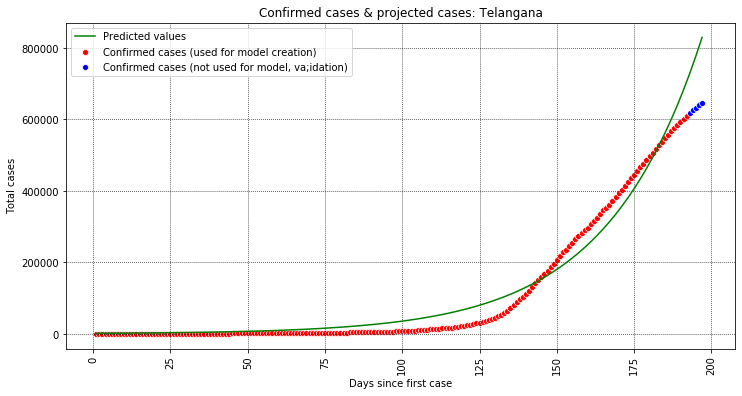

In [7]:
#All India
#CVD_India = CVD_aggregate
CVD_Maharashtra = CVD_state_aggregate[CVD_state_aggregate['State']=='Maharashtra']
CVD_Telangana = CVD_state_aggregate[CVD_state_aggregate['State']=='Telengana']
CVD_Andhra = CVD_state_aggregate[CVD_state_aggregate['State']=='Andhra Pradesh']
d_df = CVD_Andhra.copy()
plot_exponential_fit_data(d_df, 'Telangana', 5)

In [8]:
df=pd.read_excel("D:\STUDY 5\SCM Project/State Cases.xlsx")

In [9]:
df

,State,Convirmed,Recovery,Deaths
0,Andaman and Nicobar Islands,3712,3494,52
1,Andhra Pradesh,654385,579474,5558
2,Arunachal Pradesh,8133,5903,14
3,Assam,163491,132709,597
4,Bihar,174266,159700,878
5,Chandigarh,10968,8342,144
6,Chhattisgarh,93351,56773,728
7,Dadar & Nagar Haveli; Daman & Diu,2944,2725,2
8,Delhi,260623,224375,5123
9,Goa,30552,24347,383


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [11]:
df['Active Cases']=df['Convirmed']-(df['Recovery']+df['Deaths'])

df
df.style.background_gradient(cmap='Reds')

,State,Convirmed,Recovery,Deaths,Active Cases
0,Andaman and Nicobar Islands,3712,3494,52,166
1,Andhra Pradesh,654385,579474,5558,69353
2,Arunachal Pradesh,8133,5903,14,2216
3,Assam,163491,132709,597,30185
4,Bihar,174266,159700,878,13688
5,Chandigarh,10968,8342,144,2482
6,Chhattisgarh,93351,56773,728,35850
7,Dadar & Nagar Haveli; Daman & Diu,2944,2725,2,217
8,Delhi,260623,224375,5123,31125
9,Goa,30552,24347,383,5822


In [12]:
Total_Active_Cases=df.groupby('State')['Active Cases'].sum().sort_values(ascending=False).to_frame()
Total_Active_Cases
Total_Active_Cases.style.background_gradient(cmap='Reds')

,Active Cases
State,
Maharashtra,274998
Karnataka,95568
Andhra Pradesh,69353
Uttar Pradesh,61300
Tamil Nadu,46405
Kerala,45993
Chhattisgarh,35850
Odisha,34494
Delhi,31125


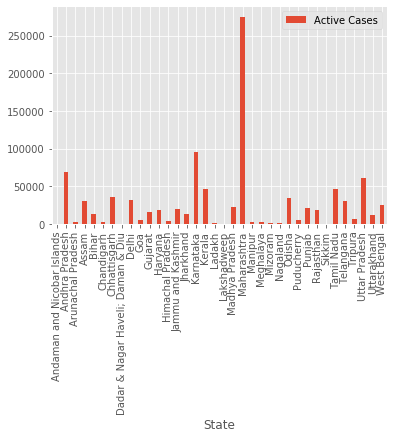

In [13]:
#Pandas vis

df.plot(kind='bar', x='State',y='Active Cases')

#Plotly
df.iplot(kind='bar',x='State',y='Active Cases')

plt.show()